#Problem Statement:

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year.

Dependent variable - No need to create any new variable, as the 'Default' variable is already provided in the dataset, which can be considered as the dependent variable.

Test Train Split - Split the data into train and test datasets in the ratio of 67:33 and use a random state of 42 (random_state=42). Model building is to be done on the train dataset and model validation is to be done on the test dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
path=("/content/drive/MyDrive/Finance and risk.xlsx")
df=pd.read_excel(path)

In [4]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [ ]:
df.shape

(2058, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [ ]:
df["_Tax_rate_A"].value_counts()

0.000000    909
0.012856      4
0.001417      3
0.098391      3
0.237777      3
           ... 
0.161454      1
0.263691      1
0.169754      1
0.086142      1
0.306205      1
Name: _Tax_rate_A, Length: 985, dtype: int64

In [ ]:
df["_Interest_bearing_debt_interest_rate"].value_counts()

0.000000    170
0.000647      8
0.000327      8
0.000351      8
0.000474      8
           ... 
0.001009      1
0.000202      1
0.000413      1
0.003393      1
0.000941      1
Name: _Interest_bearing_debt_interest_rate, Length: 813, dtype: int64

In [ ]:
df["_Inventory_to_Current_Liability"].value_counts()

0.000000    127
0.017945      1
0.031906      1
0.013582      1
0.012169      1
           ... 
0.009394      1
0.011137      1
0.005171      1
0.013119      1
0.014941      1
Name: _Inventory_to_Current_Liability, Length: 1932, dtype: int64

In [ ]:
df["_Long_term_Liability_to_Current_Assets"].value_counts()

0.000000    661
0.003064      1
0.000816      1
0.005658      1
0.000382      1
           ... 
0.004009      1
0.026361      1
0.084135      1
0.051986      1
0.001127      1
Name: _Long_term_Liability_to_Current_Assets, Length: 1398, dtype: int64

In [ ]:
df["_Research_and_development_expense_rate"].value_counts()

0.000000e+00    910
1.700000e+08      8
5.090000e+07      8
3.400000e+07      8
8.150000e+08      7
               ... 
6.430000e+09      1
7.860000e+09      1
6.960000e+09      1
1.069650e-04      1
8.370000e+09      1
Name: _Research_and_development_expense_rate, Length: 629, dtype: int64

* Dropped Co_code, Co_name as they are of no use for us.
* Dropped Liability assets flag and net income flag are deleted as they have constant values.
* Dropped Tax rate A, Long term liability to current assets, Research and development expense rate are deleted as they have 909, 661 and 910 rows as 0

In [ ]:
df.drop(["Co_Code","Co_Name","_Liability_Assets_Flag","_Net_Income_Flag","_Tax_rate_A","_Long_term_Liability_to_Current_Assets",
         "_Research_and_development_expense_rate"],axis=1,inplace=True)

# 1.2 Null values

In [ ]:
df.isnull().sum()

_Operating_Expense_Rate                                0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth                        21
_Long_term_fund_suitability_ratio_A                    0
_Net_profit_before_tax_to_Paid_

In [ ]:
def imputing_null(df):
  for i in df.columns:
    if df[i].dtype=="float64":
      df[i].fillna(df[i].median(),inplace=True)
  return df
df1=imputing_null(df)
df1.isnull().sum()

_Operating_Expense_Rate                              0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term_fund_suitability_ratio_A                  0
_Net_profit_before_tax_to_Paid_in_capital            0
_Total_Ass

* Null values are imputed using median values of respective variables, as
the variables are not normally distributed.
* Null values are treated before treating outliers, as we have null values in some variables, treating outliers will not possible for that variables without treating null values

#1.1 Outlier Treatment

* Quartiles of 25% and 75% i.e., q25 and q75 are calculated.
* Outliers are removed using Inter Quartile Range (IQR) method.
* iqr = q75 – q25
* lower_range = q25 – (1.5*iqr)
* upper_range= q75 + (1.5*iqr)
* Using above formulas, values greater than the value of upper_range and values
lower than lower_range are replaced with upper_range and lower_range values.



In [ ]:
df_x=df1.drop(["Default"],axis=1)
df_y=df1["Default"]

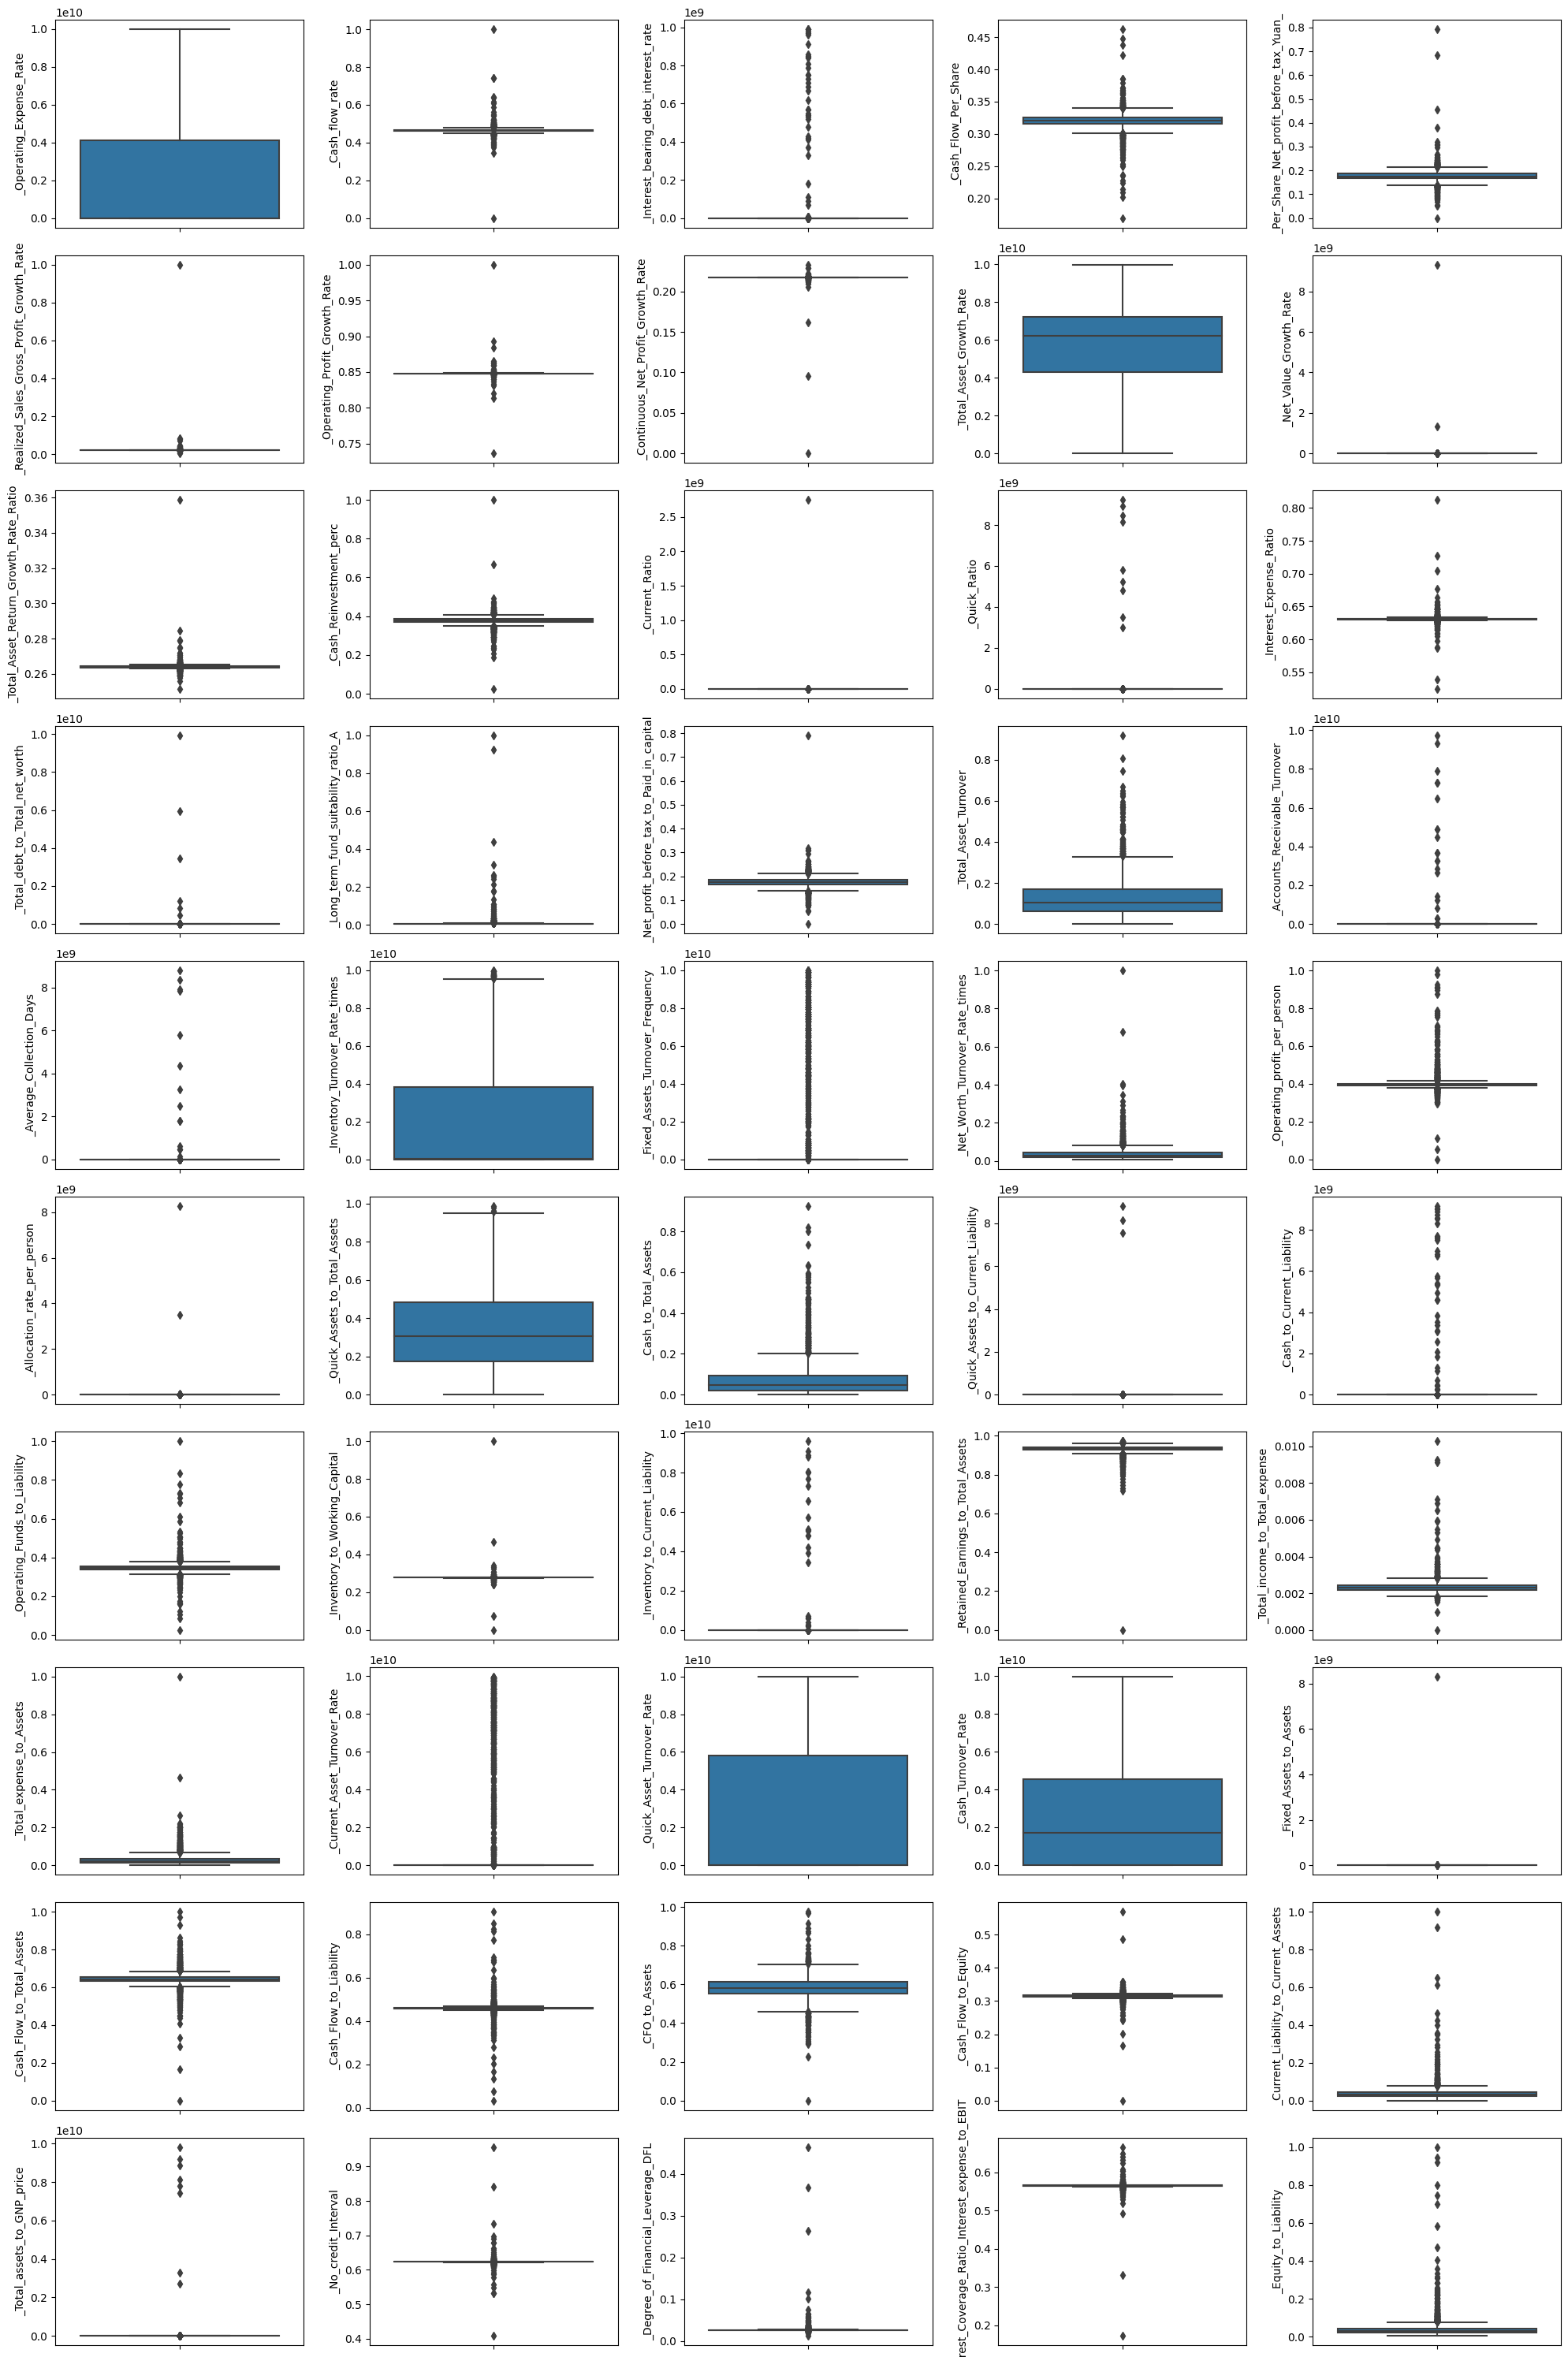

In [ ]:
plt.figure(figsize=(20,30))
feature_list=df_x.columns
for i in range(len(feature_list)):
  plt.subplot(10,5,i+1)
  sns.boxplot(y=df_x[feature_list[i]])
  plt.tight_layout()

In [ ]:
def treat_outlier(x):
  q25=np.percentile(x,25)
  q75=np.percentile(x,75)
  iqr=q75-q25
  lower_range=q25-(1.5*iqr)
  upper_range=q75+(1.5*iqr)
  return lower_range,upper_range

In [ ]:
feature_list=df_x.columns
for i in feature_list:
    LL, UL = treat_outlier(df_x[i])
    df_x[i] = np.where(df_x[i] > UL, UL, df_x[i])
    df_x[i] = np.where(df_x[i] < LL, LL, df_x[i])

In [ ]:
df_x.shape

(2058, 50)

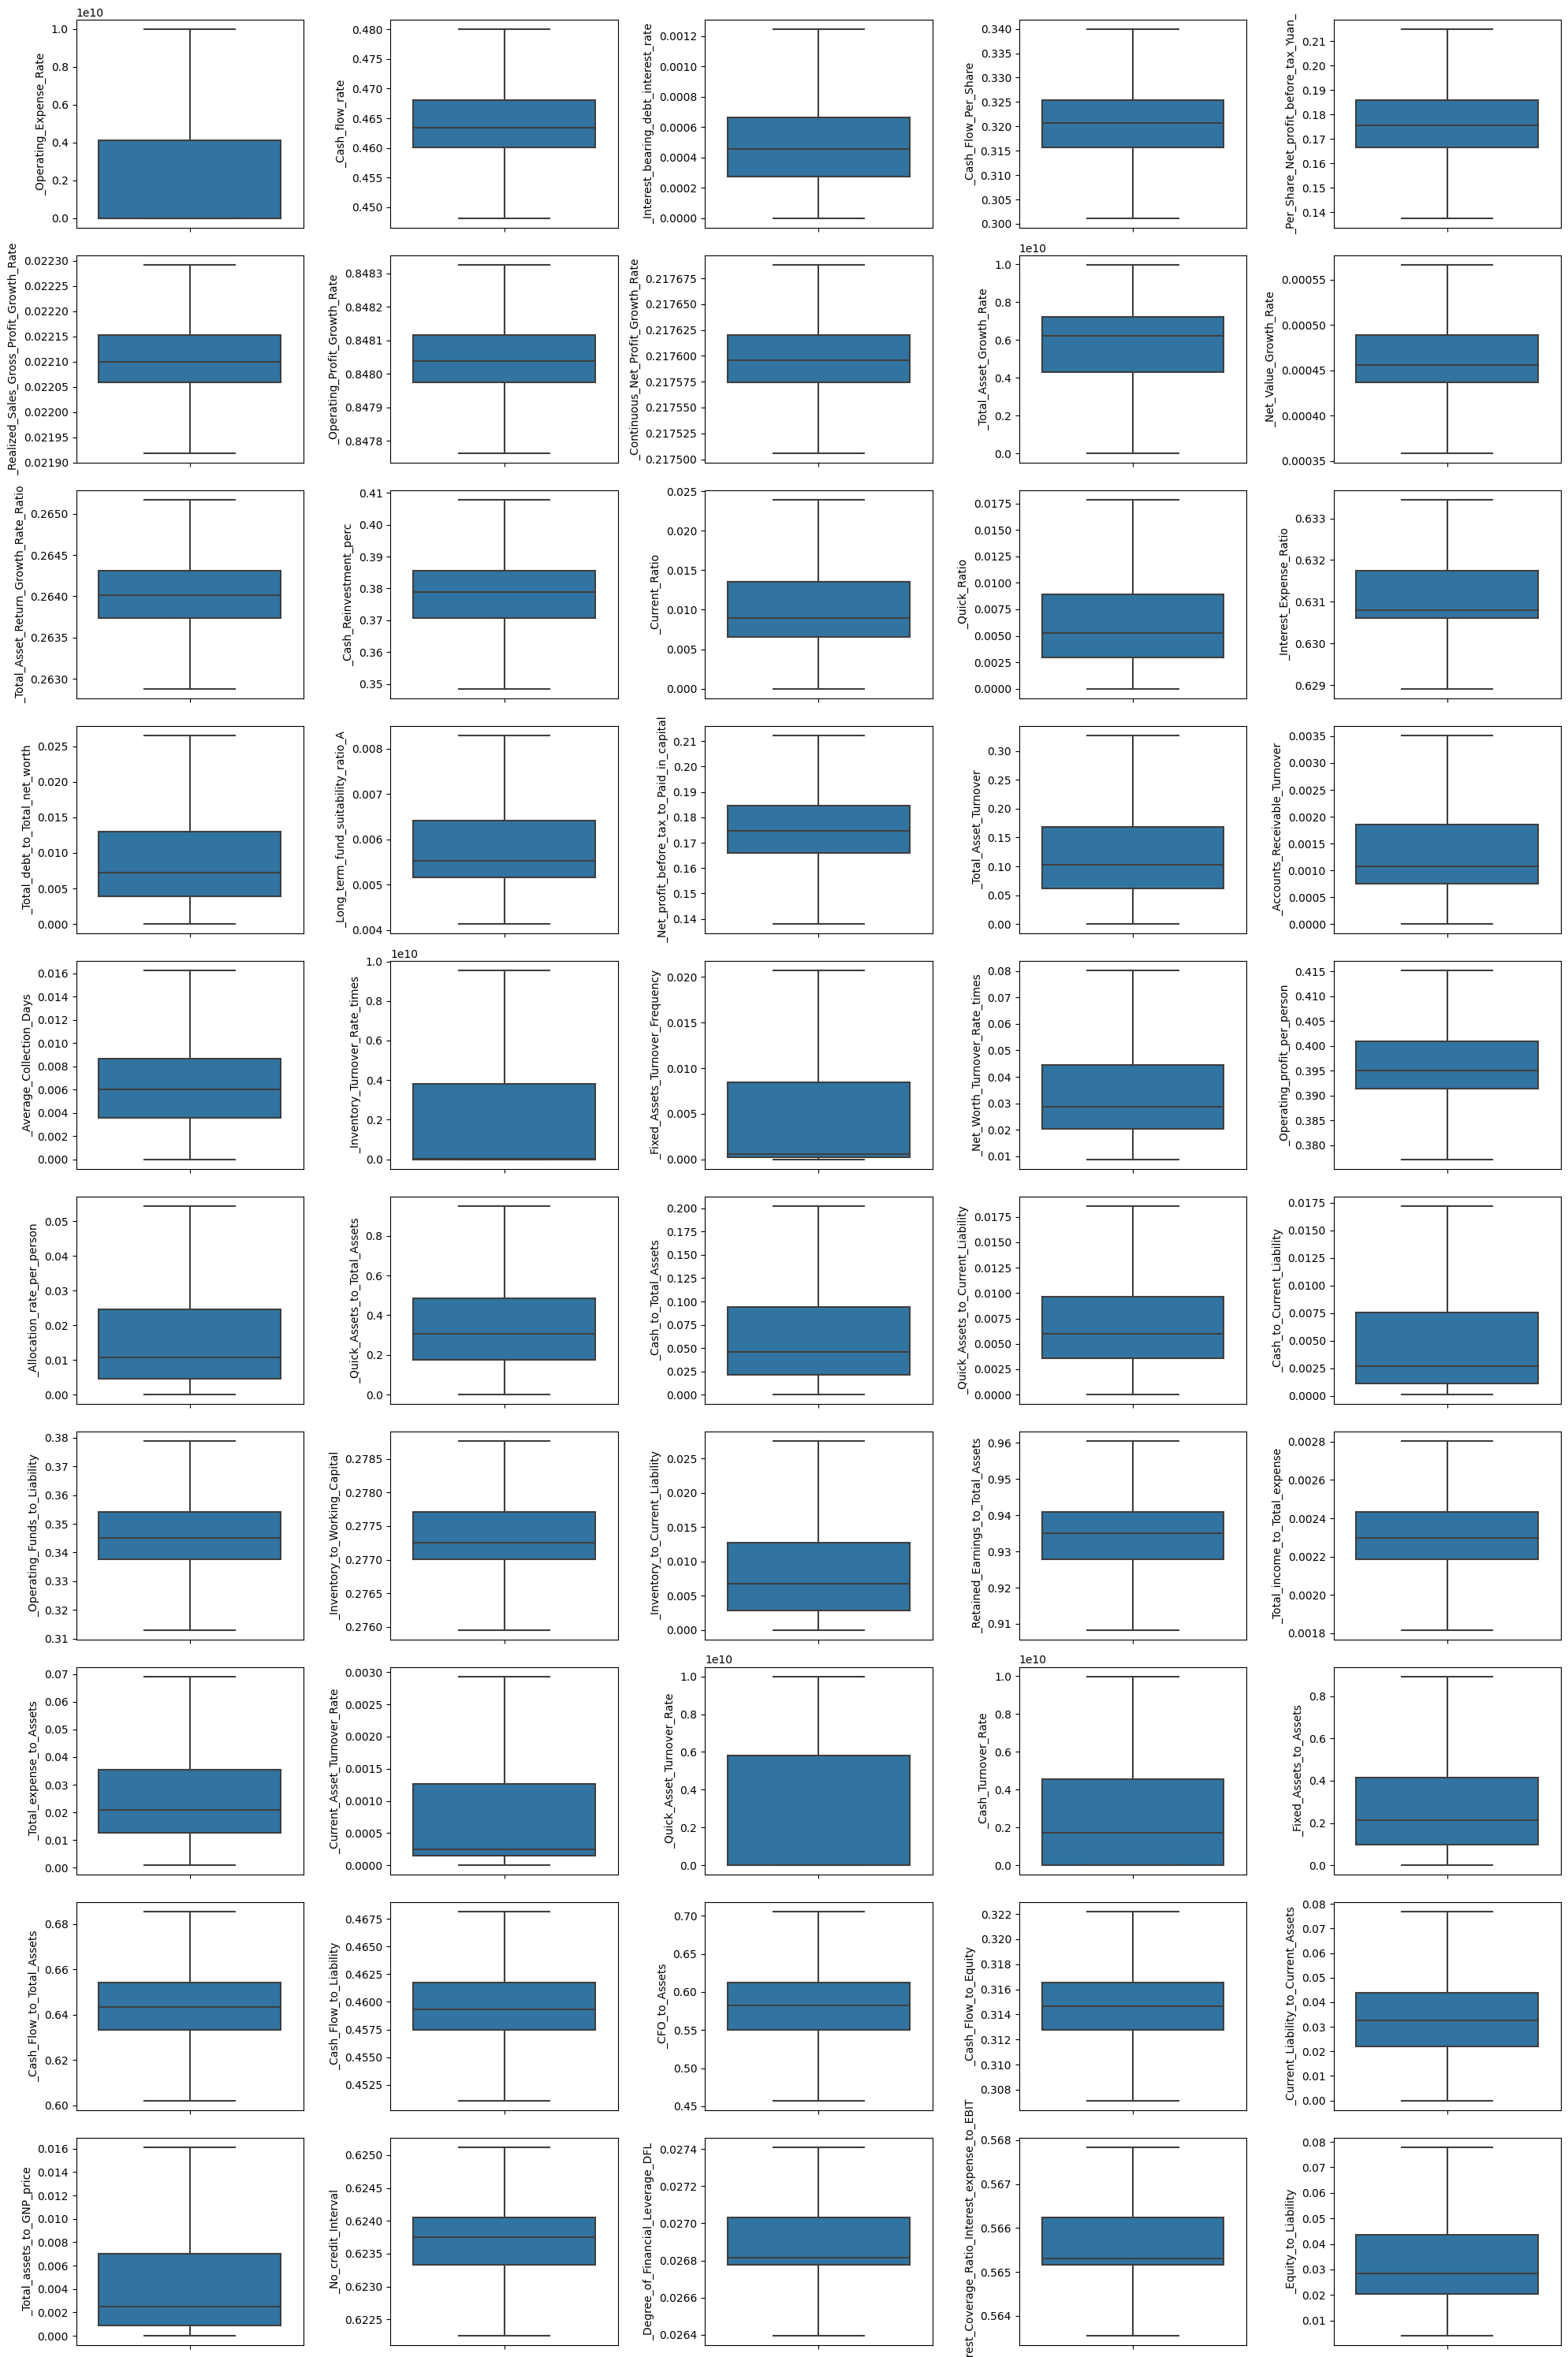

In [ ]:
plt.figure(figsize=(20,30))
feature_list=df_x.columns
for i in range(len(feature_list)):
  plt.subplot(10,5,i+1)
  sns.boxplot(y=df_x[feature_list[i]])
  plt.tight_layout()

# 1.3 Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)
## 1.4 Train Test Split

* As we have about 58 variables in the data set, by using Variance inflation factor some of the variables are removed from the data set.
* Multicollinearity can be measured by using Variance inflation factor, 1 being there is no multicollinearity between variables and Infinity being there is high collinearity between variables.
* Imported train_test_split from sklearn.model selection.
* x = all independent variables
* y = dependent variable which is Default.
* Split the data into training test and testing set.
* From statsmodels.stats.outliers_influence imported Variance_inflation_factor (VIF)
* Created a Series using pandas and x_train as input.
* Calculated VIF values for all the independent variables in the data set

In [ ]:
data1=pd.concat([df_x,df_y],axis=1)
data1.head()

,_Operating_Expense_Rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,...,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Equity_to_Liability,Default
0,8.820000e+09,0.462045,0.000352,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,...,0.458073,0.576869,0.310901,0.034913,0.016143,0.622251,0.026930,0.565744,0.015338,0
1,9.380000e+09,0.460116,0.000716,0.315520,0.161633,0.021918,0.847763,0.217506,6.750000e+09,0.000403,...,0.459282,0.551523,0.314572,0.041653,0.006191,0.622513,0.026395,0.563546,0.029445,1
2,3.800000e+09,0.449893,0.000496,0.301182,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,...,0.459700,0.463045,0.314777,0.033560,0.001095,0.623749,0.027276,0.566744,0.041718,0
3,6.440000e+09,0.462731,0.000592,0.319834,0.174738,0.022293,0.848326,0.217662,7.520000e+09,0.000448,...,0.461860,0.577212,0.316974,0.016527,0.003749,0.622963,0.026988,0.565950,0.026956,0
4,3.680000e+09,0.463117,0.000782,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,...,0.461238,0.594038,0.317729,0.034497,0.006595,0.624419,0.027410,0.567177,0.019900,0


In [ ]:
from sklearn.model_selection import train_test_split
x=data1.drop(["Default"],axis=1)
y=data1["Default"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))

VIF values: _Operating_Expense_Rate                                1.347443
_Cash_flow_rate                                       16.393994
_Interest_bearing_debt_interest_rate                   1.140237
_Cash_Flow_Per_Share                                   6.661404
_Per_Share_Net_profit_before_tax_Yuan_               104.702110
_Realized_Sales_Gross_Profit_Growth_Rate               2.118597
_Operating_Profit_Growth_Rate                          1.906471
_Continuous_Net_Profit_Growth_Rate                     3.110231
_Total_Asset_Growth_Rate                               1.200779
_Net_Value_Growth_Rate                                 2.921463
_Total_Asset_Return_Growth_Rate_Ratio                  2.934035
_Cash_Reinvestment_perc                               12.850225
_Current_Ratio                                        17.951810
_Quick_Ratio                                          13.437420
_Interest_Expense_Ratio                                4.704061
_Total_debt_to_Total_net_wor

In [ ]:
data1.drop(["_Per_Share_Net_profit_before_tax_Yuan_","_Net_profit_before_tax_to_Paid_in_capital"],axis=1,inplace=True)

* Variables like Per share net profit before tax yuan and Net profit before tax to paid in capital has VIF values 104, these 2 are dropped from the data set.


In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))

VIF values: _Operating_Expense_Rate                               1.341155
_Cash_flow_rate                                      16.329266
_Interest_bearing_debt_interest_rate                  1.136394
_Cash_Flow_Per_Share                                  6.601071
_Realized_Sales_Gross_Profit_Growth_Rate              2.101495
_Operating_Profit_Growth_Rate                         1.904799
_Continuous_Net_Profit_Growth_Rate                    3.106306
_Total_Asset_Growth_Rate                              1.178282
_Net_Value_Growth_Rate                                2.673382
_Total_Asset_Return_Growth_Rate_Ratio                 2.702869
_Cash_Reinvestment_perc                              12.472020
_Current_Ratio                                       17.871192
_Quick_Ratio                                         13.364842
_Interest_Expense_Ratio                               4.671699
_Total_debt_to_Total_net_worth                        4.810073
_Long_term_fund_suitability_ratio_A        

In [ ]:
data1.drop(["_Cash_Flow_to_Total_Assets","_Quick_Assets_to_Current_Liability","_CFO_to_Assets"],axis=1,inplace=True)

* VIF scores of data are calculated by using the same method.
Variables Cash flow to total assets, Quick assets to current liability and CFO to assets are dropped from the data set which has 56, 31 and 25.
* The process is iterated until the VIF values of the variables have come closer to 1.
* Variables which have VIF scores which are closer to 1 are 16 variables

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))

VIF values: _Operating_Expense_Rate                               1.340863
_Cash_flow_rate                                      15.613904
_Interest_bearing_debt_interest_rate                  1.127859
_Cash_Flow_Per_Share                                  6.024756
_Realized_Sales_Gross_Profit_Growth_Rate              2.095089
_Operating_Profit_Growth_Rate                         1.902809
_Continuous_Net_Profit_Growth_Rate                    3.105325
_Total_Asset_Growth_Rate                              1.177105
_Net_Value_Growth_Rate                                2.629757
_Total_Asset_Return_Growth_Rate_Ratio                 2.699868
_Cash_Reinvestment_perc                               6.795033
_Current_Ratio                                       13.705490
_Quick_Ratio                                          7.686825
_Interest_Expense_Ratio                               4.667464
_Total_debt_to_Total_net_worth                        4.682741
_Long_term_fund_suitability_ratio_A        

In [ ]:
data1.drop(["_Net_Worth_Turnover_Rate_times","_Operating_Funds_to_Liability"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))

VIF values: _Operating_Expense_Rate                               1.339179
_Cash_flow_rate                                       3.489803
_Interest_bearing_debt_interest_rate                  1.122370
_Cash_Flow_Per_Share                                  6.018726
_Realized_Sales_Gross_Profit_Growth_Rate              2.094011
_Operating_Profit_Growth_Rate                         1.890964
_Continuous_Net_Profit_Growth_Rate                    3.098362
_Total_Asset_Growth_Rate                              1.176492
_Net_Value_Growth_Rate                                2.598008
_Total_Asset_Return_Growth_Rate_Ratio                 2.688849
_Cash_Reinvestment_perc                               5.983964
_Current_Ratio                                       13.556439
_Quick_Ratio                                          7.530695
_Interest_Expense_Ratio                               4.664167
_Total_debt_to_Total_net_worth                        3.128687
_Long_term_fund_suitability_ratio_A        

In [ ]:
data1.drop(["_Current_Ratio","_Current_Liability_to_Current_Assets"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                              1.337880
_Cash_flow_rate                                      3.475874
_Interest_bearing_debt_interest_rate                 1.107319
_Cash_Flow_Per_Share                                 5.995741
_Realized_Sales_Gross_Profit_Growth_Rate             2.090232
_Operating_Profit_Growth_Rate                        1.891147
_Continuous_Net_Profit_Growth_Rate                   3.096495
_Total_Asset_Growth_Rate                             1.168709
_Net_Value_Growth_Rate                               2.576627
_Total_Asset_Return_Growth_Rate_Ratio                2.675600
_Cash_Reinvestment_perc                              5.948834
_Quick_Ratio                                         4.843904
_Interest_Expense_Ratio                              4.632363
_Total_debt_to_Total_net_worth                       2.823863
_Long_term_fund_suitability_ratio_A                  2.768276
_Total_Asset_Turnover                                3.342

In [ ]:
data1.drop(["_Interest_Coverage_Ratio_Interest_expense_to_EBIT","_Cash_Flow_Per_Share",
            "_Cash_Flow_to_Liability","_Cash_Flow_to_Equity"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                     1.330430
_Cash_flow_rate                             3.316685
_Interest_bearing_debt_interest_rate        1.098499
_Realized_Sales_Gross_Profit_Growth_Rate    2.075246
_Operating_Profit_Growth_Rate               1.875933
_Continuous_Net_Profit_Growth_Rate          3.087206
_Total_Asset_Growth_Rate                    1.162259
_Net_Value_Growth_Rate                      2.478933
_Total_Asset_Return_Growth_Rate_Ratio       2.659989
_Cash_Reinvestment_perc                     2.464474
_Quick_Ratio                                4.802830
_Interest_Expense_Ratio                     2.480709
_Total_debt_to_Total_net_worth              2.794254
_Long_term_fund_suitability_ratio_A         2.748525
_Total_Asset_Turnover                       3.314448
_Accounts_Receivable_Turnover               2.476402
_Average_Collection_Days                    2.338797
_Inventory_Turnover_Rate_times              1.223594
_Fixed_Assets_Turnover_Frequency  

In [ ]:
data1.drop(["_Equity_to_Liability","_Fixed_Assets_to_Assets",
            "_Total_income_to_Total_expense","_Quick_Assets_to_Total_Assets","_Quick_Ratio"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                     1.325672
_Cash_flow_rate                             2.960655
_Interest_bearing_debt_interest_rate        1.089966
_Realized_Sales_Gross_Profit_Growth_Rate    2.033480
_Operating_Profit_Growth_Rate               1.822750
_Continuous_Net_Profit_Growth_Rate          3.020919
_Total_Asset_Growth_Rate                    1.155858
_Net_Value_Growth_Rate                      2.402268
_Total_Asset_Return_Growth_Rate_Ratio       2.604632
_Cash_Reinvestment_perc                     2.317319
_Interest_Expense_Ratio                     2.473770
_Total_debt_to_Total_net_worth              1.676936
_Long_term_fund_suitability_ratio_A         1.546204
_Total_Asset_Turnover                       2.537041
_Accounts_Receivable_Turnover               2.416855
_Average_Collection_Days                    2.153393
_Inventory_Turnover_Rate_times              1.216731
_Fixed_Assets_Turnover_Frequency            1.424948
_Operating_profit_per_person      

In [ ]:
data1.drop(["_Continuous_Net_Profit_Growth_Rate","_Degree_of_Financial_Leverage_DFL"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                     1.318723
_Cash_flow_rate                             2.953987
_Interest_bearing_debt_interest_rate        1.089765
_Realized_Sales_Gross_Profit_Growth_Rate    1.891769
_Operating_Profit_Growth_Rate               0.059048
_Total_Asset_Growth_Rate                    1.152129
_Net_Value_Growth_Rate                      2.391455
_Total_Asset_Return_Growth_Rate_Ratio       2.196945
_Cash_Reinvestment_perc                     2.306773
_Interest_Expense_Ratio                     1.220135
_Total_debt_to_Total_net_worth              1.673559
_Long_term_fund_suitability_ratio_A         1.544011
_Total_Asset_Turnover                       2.512121
_Accounts_Receivable_Turnover               2.415253
_Average_Collection_Days                    2.152819
_Inventory_Turnover_Rate_times              1.213013
_Fixed_Assets_Turnover_Frequency            1.418288
_Operating_profit_per_person                2.369031
_Allocation_rate_per_person       

In [ ]:
data1.drop(["_Cash_to_Current_Liability","_Cash_flow_rate","_Retained_Earnings_to_Total_Assets"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                     1.307341
_Interest_bearing_debt_interest_rate        1.078442
_Realized_Sales_Gross_Profit_Growth_Rate    1.842857
_Operating_Profit_Growth_Rate               0.058747
_Total_Asset_Growth_Rate                    1.133742
_Net_Value_Growth_Rate                      2.081254
_Total_Asset_Return_Growth_Rate_Ratio       2.189108
_Cash_Reinvestment_perc                     1.166150
_Interest_Expense_Ratio                     1.210637
_Total_debt_to_Total_net_worth              1.413546
_Long_term_fund_suitability_ratio_A         1.517963
_Total_Asset_Turnover                       2.306346
_Accounts_Receivable_Turnover               2.377750
_Average_Collection_Days                    2.135097
_Inventory_Turnover_Rate_times              1.208694
_Fixed_Assets_Turnover_Frequency            1.402821
_Operating_profit_per_person                1.905216
_Allocation_rate_per_person                 2.603315
_Cash_to_Total_Assets             

In [ ]:
data1.drop(["_Allocation_rate_per_person","_Accounts_Receivable_Turnover"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                     1.305267
_Interest_bearing_debt_interest_rate        1.072796
_Realized_Sales_Gross_Profit_Growth_Rate    1.839969
_Operating_Profit_Growth_Rate               0.058502
_Total_Asset_Growth_Rate                    1.131285
_Net_Value_Growth_Rate                      2.062999
_Total_Asset_Return_Growth_Rate_Ratio       2.187682
_Cash_Reinvestment_perc                     1.157271
_Interest_Expense_Ratio                     1.203897
_Total_debt_to_Total_net_worth              1.385995
_Long_term_fund_suitability_ratio_A         1.360879
_Total_Asset_Turnover                       2.121255
_Average_Collection_Days                    1.421656
_Inventory_Turnover_Rate_times              1.195653
_Fixed_Assets_Turnover_Frequency            1.296790
_Operating_profit_per_person                1.849201
_Cash_to_Total_Assets                       1.494454
_Inventory_to_Working_Capital               1.347464
_Inventory_to_Current_Liability   

In [ ]:
data1.drop(["_Realized_Sales_Gross_Profit_Growth_Rate","_Total_Asset_Return_Growth_Rate_Ratio"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                 1.301285
_Interest_bearing_debt_interest_rate    1.071409
_Operating_Profit_Growth_Rate           0.043797
_Total_Asset_Growth_Rate                1.130073
_Net_Value_Growth_Rate                  1.645714
_Cash_Reinvestment_perc                 1.135995
_Interest_Expense_Ratio                 1.196451
_Total_debt_to_Total_net_worth          1.378748
_Long_term_fund_suitability_ratio_A     1.357857
_Total_Asset_Turnover                   2.117139
_Average_Collection_Days                1.400237
_Inventory_Turnover_Rate_times          1.195419
_Fixed_Assets_Turnover_Frequency        1.296643
_Operating_profit_per_person            1.764036
_Cash_to_Total_Assets                   1.482729
_Inventory_to_Working_Capital           1.340993
_Inventory_to_Current_Liability         1.528556
_Total_expense_to_Assets                1.753363
_Current_Asset_Turnover_Rate            1.363284
_Quick_Asset_Turnover_Rate              1.353230
_Cash_Tu

In [ ]:
data1.drop(["_Total_Asset_Turnover","_Net_Value_Growth_Rate"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                 1.189186
_Interest_bearing_debt_interest_rate    1.048418
_Operating_Profit_Growth_Rate           0.042782
_Total_Asset_Growth_Rate                1.085310
_Cash_Reinvestment_perc                 1.127037
_Interest_Expense_Ratio                 1.186795
_Total_debt_to_Total_net_worth          1.257624
_Long_term_fund_suitability_ratio_A     1.341427
_Average_Collection_Days                1.391447
_Inventory_Turnover_Rate_times          1.193832
_Fixed_Assets_Turnover_Frequency        1.213334
_Operating_profit_per_person            1.426088
_Cash_to_Total_Assets                   1.387192
_Inventory_to_Working_Capital           1.339052
_Inventory_to_Current_Liability         1.465436
_Total_expense_to_Assets                1.565556
_Current_Asset_Turnover_Rate            1.302170
_Quick_Asset_Turnover_Rate              1.262061
_Cash_Turnover_Rate                     1.044481
_Total_assets_to_GNP_price              1.291761
_No_cred

In [ ]:
data1.drop(["_Operating_profit_per_person"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                 1.180840
_Interest_bearing_debt_interest_rate    1.038069
_Operating_Profit_Growth_Rate           0.042782
_Total_Asset_Growth_Rate                1.085122
_Cash_Reinvestment_perc                 1.117824
_Interest_Expense_Ratio                 1.131466
_Total_debt_to_Total_net_worth          1.248472
_Long_term_fund_suitability_ratio_A     1.317863
_Average_Collection_Days                1.333537
_Inventory_Turnover_Rate_times          1.190768
_Fixed_Assets_Turnover_Frequency        1.187250
_Cash_to_Total_Assets                   1.386314
_Inventory_to_Working_Capital           1.338920
_Inventory_to_Current_Liability         1.463871
_Total_expense_to_Assets                1.455316
_Current_Asset_Turnover_Rate            1.295599
_Quick_Asset_Turnover_Rate              1.261141
_Cash_Turnover_Rate                     1.044361
_Total_assets_to_GNP_price              1.291113
_No_credit_Interval                     1.305916
dtype: f

In [ ]:
data1.drop(["_Quick_Asset_Turnover_Rate","_Inventory_to_Current_Liability"],axis=1,inplace=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                 1.161364
_Interest_bearing_debt_interest_rate    1.034346
_Operating_Profit_Growth_Rate           0.042662
_Total_Asset_Growth_Rate                1.081013
_Cash_Reinvestment_perc                 1.110852
_Interest_Expense_Ratio                 1.128910
_Total_debt_to_Total_net_worth          1.219924
_Long_term_fund_suitability_ratio_A     1.224580
_Average_Collection_Days                1.165418
_Inventory_Turnover_Rate_times          1.130204
_Fixed_Assets_Turnover_Frequency        1.173351
_Cash_to_Total_Assets                   1.372581
_Inventory_to_Working_Capital           1.277537
_Total_expense_to_Assets                1.416705
_Current_Asset_Turnover_Rate            1.225458
_Cash_Turnover_Rate                     1.039738
_Total_assets_to_GNP_price              1.290542
_No_credit_Interval                     1.280022
dtype: float64
(2058, 19)


In [ ]:
data1.drop(["_Total_Asset_Growth_Rate","_Inventory_Turnover_Rate_times"],axis=1,inplace=True)

<Axes: >

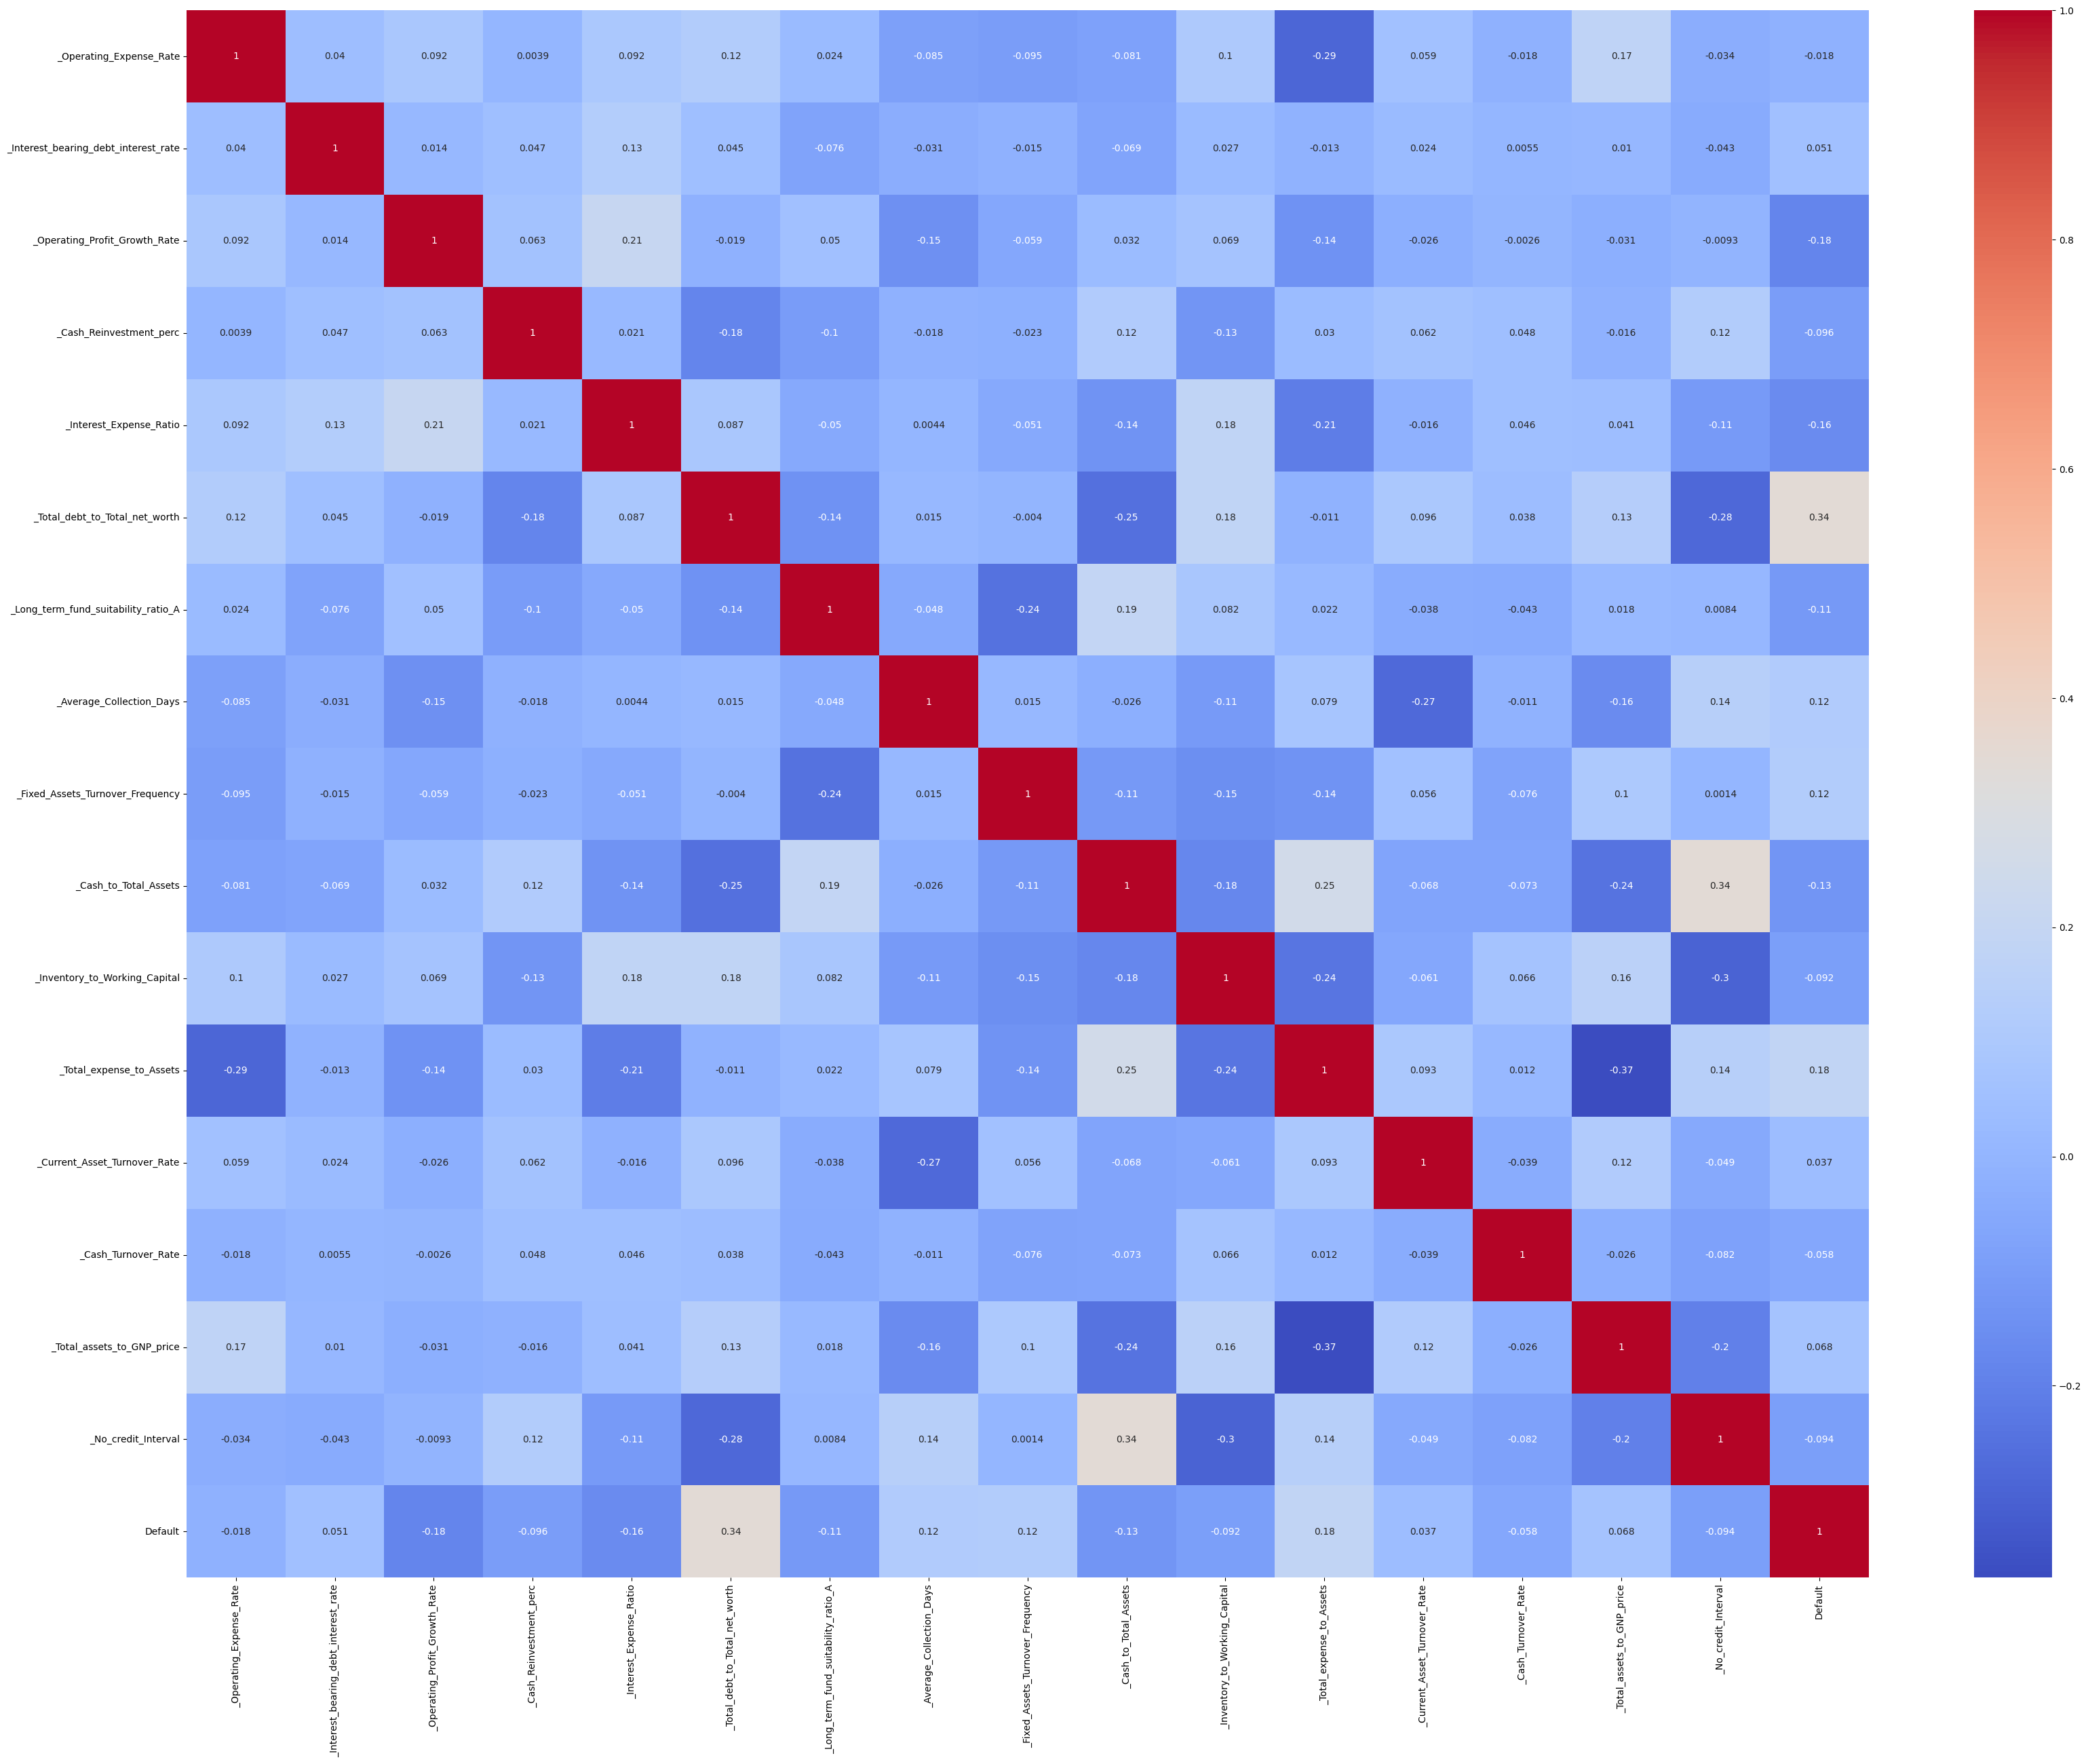

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(data1.corr(),cmap="coolwarm",annot=True)

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values: {}".format(vif_series))
print(data1.shape)

VIF values: _Operating_Expense_Rate                 1.159447
_Interest_bearing_debt_interest_rate    1.033305
_Operating_Profit_Growth_Rate           0.042283
_Cash_Reinvestment_perc                 1.099598
_Interest_Expense_Ratio                 1.121725
_Total_debt_to_Total_net_worth          1.205752
_Long_term_fund_suitability_ratio_A     1.179702
_Average_Collection_Days                1.163247
_Fixed_Assets_Turnover_Frequency        1.170026
_Cash_to_Total_Assets                   1.349893
_Inventory_to_Working_Capital           1.259991
_Total_expense_to_Assets                1.408124
_Current_Asset_Turnover_Rate            1.167958
_Cash_Turnover_Rate                     1.033215
_Total_assets_to_GNP_price              1.282358
_No_credit_Interval                     1.275880
dtype: float64
(2058, 17)


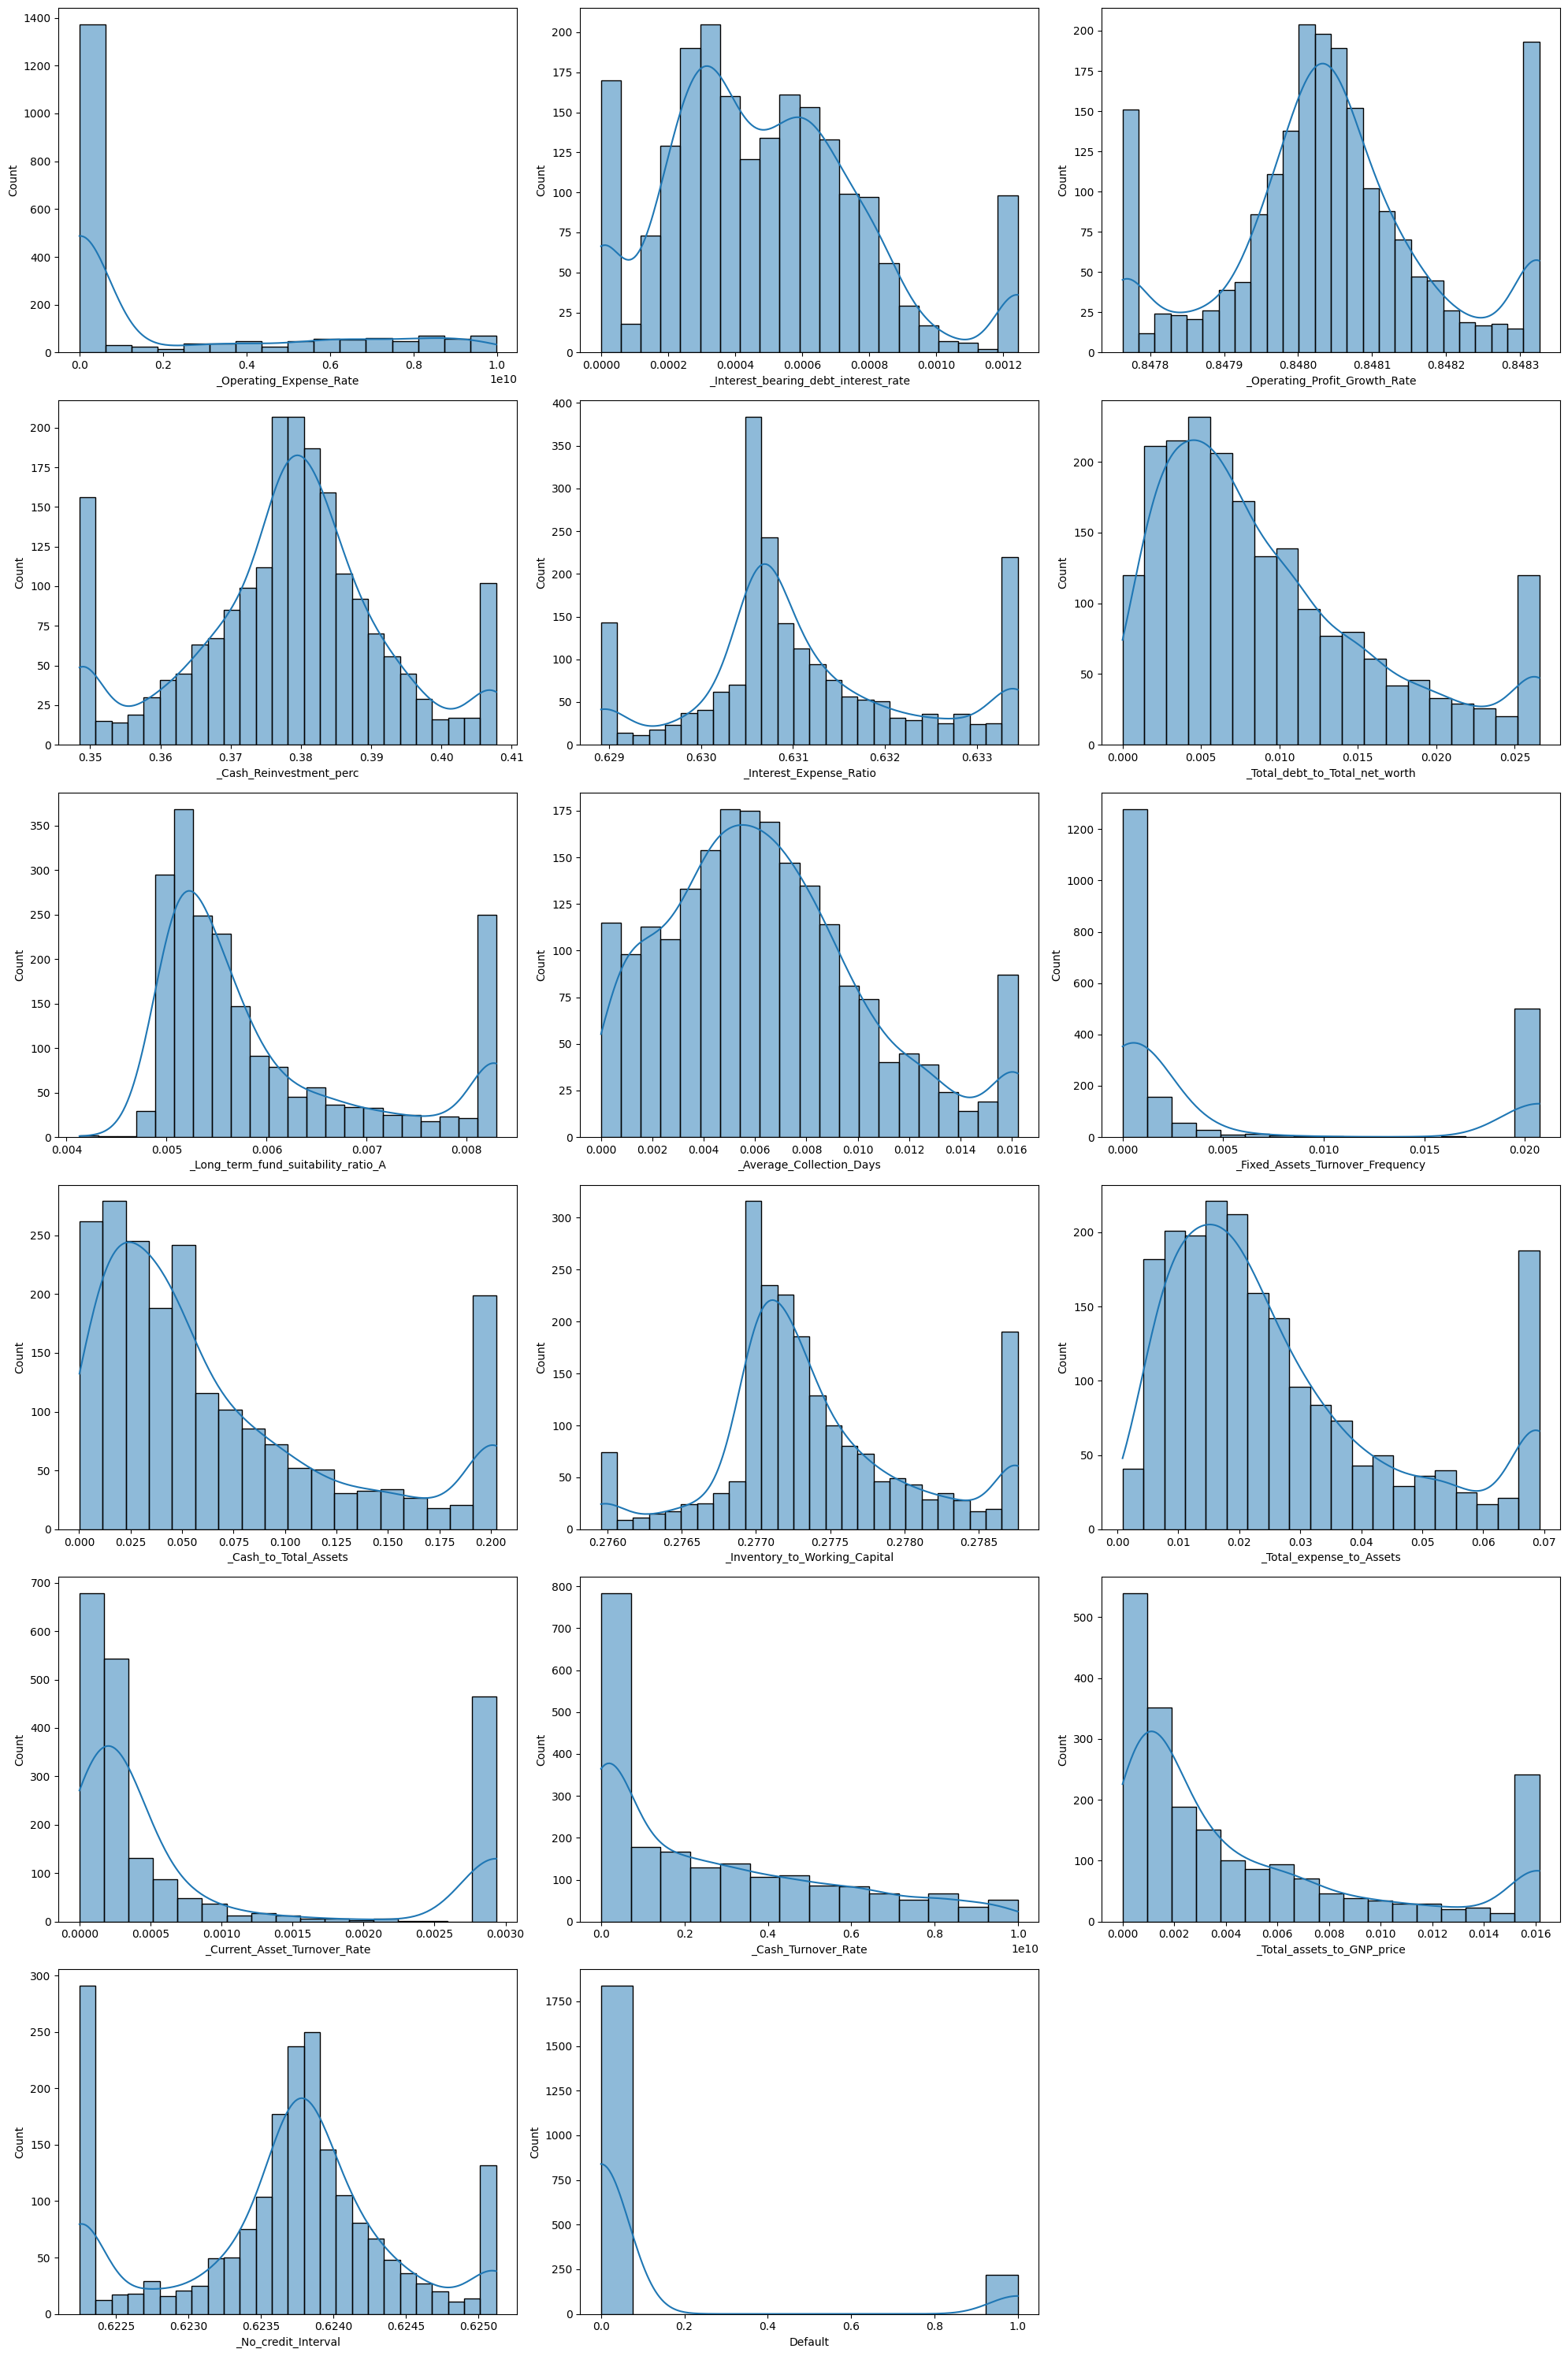

In [ ]:
plt.figure(figsize=(20,30))
feature_list=data1.columns
for i in range(len(feature_list)):
  plt.subplot(6,3,i+1)
  sns.histplot(x=data1[feature_list[i]],kde=True)
  plt.tight_layout()

<Axes: xlabel='Default', ylabel='count'>

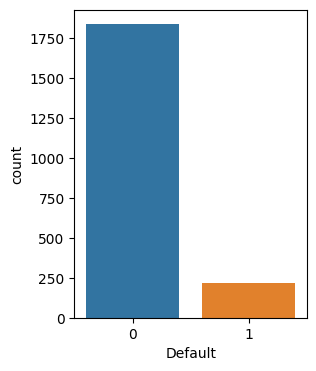

In [ ]:
plt.figure(figsize=(3,4))
sns.countplot(data=data1,x="Default")

In [ ]:
data1["Default"].value_counts()

0    1838
1     220
Name: Default, dtype: int64

#Insights from Univariate analysis:
* Operating expense rate variable is extremely right skewed.
* Interest bearing debt interest rate variable,is right skewed.
* Operating profit growth rate variable is normally distributed
* Cash reinvestment perc variable is slightly left skewed.
* Interest expense ratio variable is slightly right skewed.
* Total debt to total net worth variable is completely right skewed.
*  Long term fund suitability ratio A variable is right skewed.
* Average collection days is right skewed.
* Fixed assets turnover frequency variable is right skewed.
* Cash to total assets is completely right skewed.
* Inventory to working capital variable is normally distributed.
* Total expense to assets variable is rightly skewed.
* Current asset turnover rate is completely right skewed.
* Cash turnover rate is right skewed.
* Total assets to GNP price variable is completely right skewed.
* No credit interval variable is lightly left skewed.
* Target variable number of defaulted companies are far very less than non-default companies in the given data set.








#Bivariate analysis

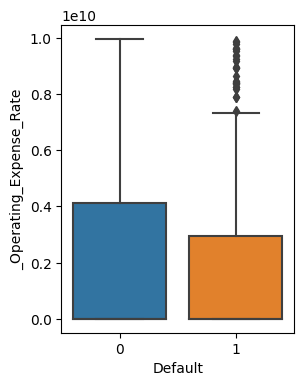

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Operating_Expense_Rate");

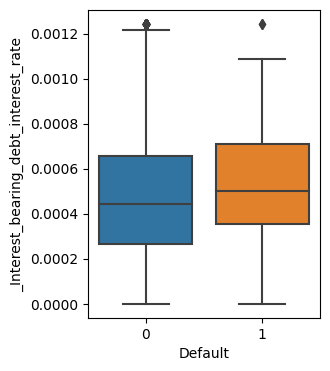

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Interest_bearing_debt_interest_rate");

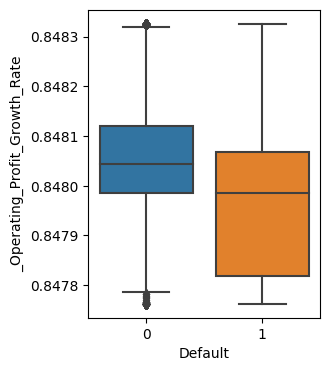

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Operating_Profit_Growth_Rate");

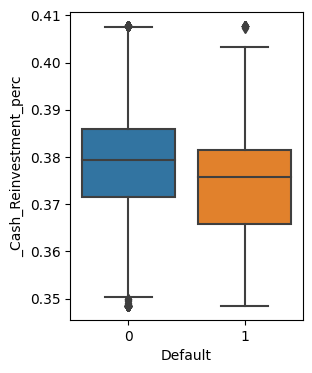

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Cash_Reinvestment_perc");

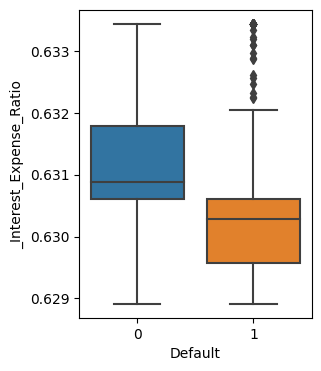

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Interest_Expense_Ratio");

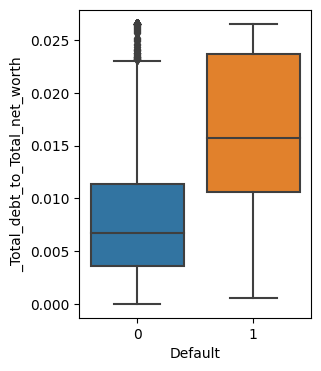

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Total_debt_to_Total_net_worth");

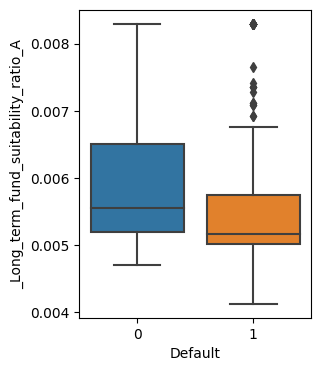

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Long_term_fund_suitability_ratio_A");

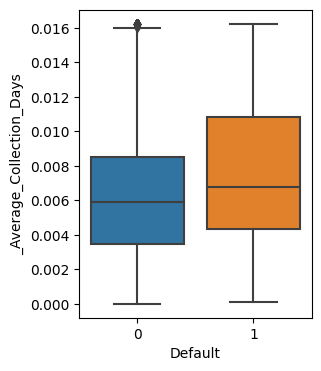

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Average_Collection_Days");

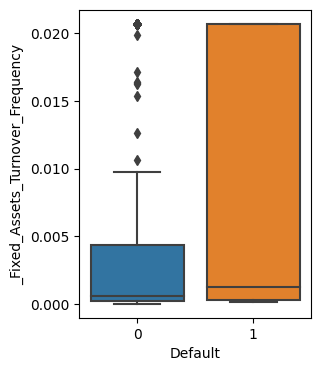

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Fixed_Assets_Turnover_Frequency");

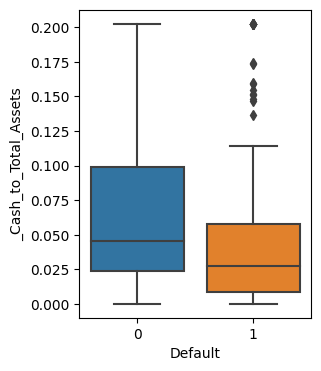

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Cash_to_Total_Assets");

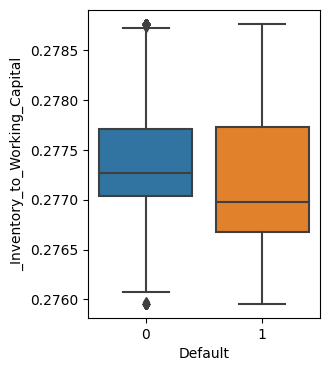

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Inventory_to_Working_Capital");

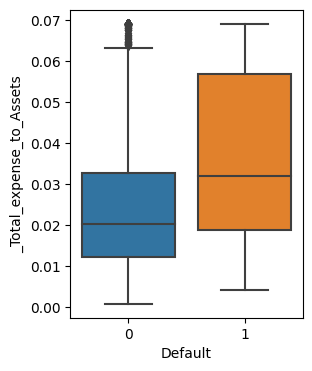

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Total_expense_to_Assets");

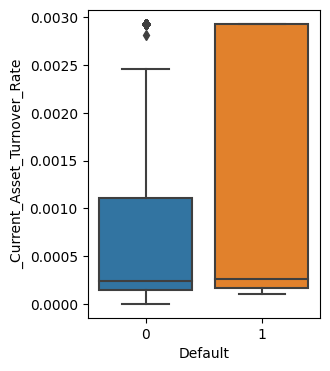

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Current_Asset_Turnover_Rate");

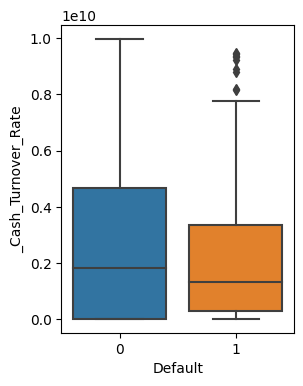

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Cash_Turnover_Rate");

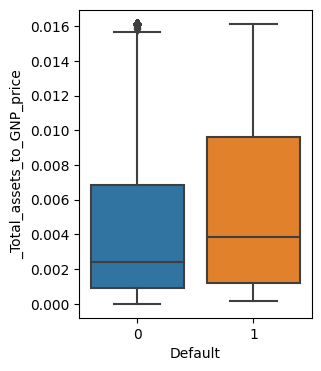

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_Total_assets_to_GNP_price");

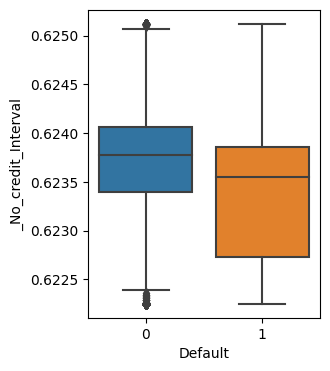

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data=data1,x="Default",y="_No_credit_Interval");

# Bivariate analysis:
* Operating expense rate vs default variable,there is no much difference of operating rate values for default and non-defaulted companies.
* Default vs Interest bearing debt interest rate variable,the companies defaulted have higher mean value of interest bearing debt interest rate than the non-defaulted companies.
* Default vs operating profit growth rate variable,the companies defaulted have less mean value of operating profit growth rate than the non-defaulted companies.
* Default vs cash reinvestment perc variable,the companies defaulted have less mean value of cash reinvestment perc than the non-defaulted companies.
* Default vs Interest expense ratio variable,the companies defaulted have less mean value of Interest expense ratio than the non-defaulted companies.
* Default vs total debt to total net worth variable,the companies defaulted have much higher mean value of total debt to total net worth than the non-defaulted companies.
* Default vs Long term fund suitability ratio A variable,the companies defaulted have much lesser mean value of Long term fund suitability ratio A than the non-defaulted companies.
* Default vs Average collection days variable,the companies defaulted have high mean value of average collection days than the non-defaulted companies.
* Default vs fixed assets turnover frequency variable,the companies defaulted have high mean value of fixed assets turnover frequency than the non-defaulted companies.
* Default vs cash to total assets variable,the companies defaulted have less mean value of cash to total assets than the non-defaulted companies.
*  Default vs inventory to working capital variable,the companies defaulted have less mean value of inventory to working capital than the non-defaulted companies.
* Default vs total expense to assets variable,the companies defaulted have much higher mean value of total expense to assets than the non-defaulted companies.
* Current asset turnover rate vs default variable,there is no much difference of current asset turnover rate values for default and non-defaulted companies
* Default vs cash turnover rate variable,the companies defaulted have less mean value of cash turnover rate than the non-defaulted companies.
* Default vs total assets to GNP price,the companies defaulted have high mean value of total assets to GNP price than the non-defaulted companies.
* Default vs no credit interval,the companies defaulted have less mean value of no credit interval than the non-defaulted companies.


#Train Test split:
* From sklearn.model_selection imported train_test_split for model building.
* All independent variables are stored in x and depedent variable is stored in y.
* Then using train_test_split x and y are split into x_train, x_test, y_train and y_test with test_size as 0.33 and random_state as 42

In [ ]:
x=data1.drop(["Default"],axis=1)
y=data1["Default"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.head()

,_Operating_Expense_Rate,_Interest_bearing_debt_interest_rate,_Operating_Profit_Growth_Rate,_Cash_Reinvestment_perc,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Average_Collection_Days,_Fixed_Assets_Turnover_Frequency,_Cash_to_Total_Assets,_Inventory_to_Working_Capital,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Total_assets_to_GNP_price,_No_credit_Interval
631,1.053450e-04,0.000382,0.847945,0.375014,0.631476,0.011789,0.005459,0.005109,0.000390,0.041064,0.277631,0.026109,0.002934,2.260000e+09,0.014029,0.623649
1799,1.569190e-04,0.001244,0.847962,0.394341,0.630613,0.001071,0.005759,0.006171,0.000244,0.202581,0.277063,0.024401,0.000194,3.602170e-04,0.000407,0.625104
1924,5.556330e-04,0.000191,0.848022,0.385502,0.630786,0.007271,0.005395,0.000251,0.000242,0.054479,0.277098,0.069197,0.002934,3.330000e+09,0.003315,0.623745
1629,8.520000e+08,0.000724,0.847973,0.379373,0.630971,0.010729,0.007734,0.003499,0.001250,0.202581,0.277216,0.019023,0.000116,1.666360e-04,0.016143,0.623962
363,7.870000e+09,0.000391,0.847832,0.383564,0.630712,0.001399,0.005784,0.001813,0.000111,0.005908,0.277393,0.005160,0.000295,1.230000e+09,0.002201,0.622251


In [ ]:
x_test.head()

,_Operating_Expense_Rate,_Interest_bearing_debt_interest_rate,_Operating_Profit_Growth_Rate,_Cash_Reinvestment_perc,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Average_Collection_Days,_Fixed_Assets_Turnover_Frequency,_Cash_to_Total_Assets,_Inventory_to_Working_Capital,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Total_assets_to_GNP_price,_No_credit_Interval
1298,1.598100e-04,0.000560,0.848208,0.348487,0.631455,0.010545,0.006512,0.004223,0.001865,0.202581,0.277200,0.043870,0.000153,1.483710e-04,0.004867,0.623881
591,6.310000e+09,0.000831,0.848178,0.398038,0.630923,0.003829,0.005972,0.004044,0.000919,0.045632,0.277065,0.028260,0.002934,6.950000e+09,0.002120,0.624135
1318,6.667600e-04,0.000220,0.847763,0.375703,0.630094,0.002870,0.005989,0.009638,0.000216,0.095033,0.277395,0.044906,0.000335,1.892490e-04,0.000468,0.623768
1067,1.231530e-04,0.000556,0.848039,0.386508,0.631297,0.004858,0.005019,0.007789,0.020716,0.045632,0.277606,0.017185,0.000113,1.690000e+09,0.002564,0.623651
29,1.169080e-04,0.000404,0.847767,0.379885,0.628913,0.004877,0.005056,0.008816,0.020716,0.034679,0.277914,0.016388,0.000117,4.380000e+09,0.001478,0.623948


In [ ]:
y_train.head()

631     0
1799    0
1924    0
1629    0
363     0
Name: Default, dtype: int64

In [ ]:
y_test.head()

1298    0
591     0
1318    0
1067    0
29      0
Name: Default, dtype: int64

#1.5. Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.237412
         Iterations 11


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Tue, 15 Aug 2023   Pseudo R-squ.:                  0.3191
Time:                        04:24:38   Log-Likelihood:                -327.15
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.360e-56
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
_Operating_Expense_Rate               4.087e-11   3.47e-11      1.176      0.240   -2.72e-11    1.09e-10
_Interest_bearing_debt_interest_rate  1286.9340    386.420      3.330      0.001     529.565    2044.303
_Operating_Profit_Growth_Rate          472.8977    129.367      3.655      0.000     219.343     726.452
_Cash_Reinvestment_perc                -20.8760      7.215     -2.893      0.004     -35.017      -6.735
_Interest_Expense_Ratio               -283.5600     78.214     -3.625      0.000    -436.856    -130.264
_Total_debt_to_Total_net_worth         129.6894     14.334      9.048      0.000     101.596     157.783
_Long_term_fund_suitability_ratio_A   -228.6266    118.005     -1.937      0.053    -459.912       2.658
_Average_Collection_Days                88.6737     24.763      3.581      0.000      40.140     137.208
_Fixed_Assets_Turnover_Frequency        52.5701     12.065      4.357      0.000      28.923      76.217
_Cash_to_Total_Assets                   -5.2355      2.326     -2.251      0.024      -9.793      -0.677
_Inventory_to_Working_Capital         -221.4249    147.016     -1.506      0.132    -509.570      66.720
_Total_expense_to_Assets                43.5087      6.246      6.966      0.000      31.267      55.750
_Current_Asset_Turnover_Rate          -142.0540     96.341     -1.474      0.140    -330.879      46.771
_Cash_Turnover_Rate                  -4.493e-11   3.99e-11     -1.126      0.260   -1.23e-10    3.33e-11
_Total_assets_to_GNP_price              69.1991     20.955      3.302      0.001      28.127     110.271
_No_credit_Interval                   -253.4440    137.751     -1.840      0.066    -523.431      16.543
========================================================================================================
"""

In [ ]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,train_pred.round()))
print(classification_report(y_train,train_pred.round()))

[[1196   29]
 [ 104   49]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1225
           1       0.63      0.32      0.42       153

    accuracy                           0.90      1378
   macro avg       0.77      0.65      0.69      1378
weighted avg       0.89      0.90      0.89      1378



* Logistic Regression model performed well in terms of precision values but it didn’t perform well for recall.
* Out of 153 defaults Logistic regression predicted 49 defaults.


In [ ]:
y_train.value_counts()

0    1225
1     153
Name: Default, dtype: int64

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train,train_pred.round()).ravel()
tn,fp,fn,tp

(1196, 29, 104, 49)

In [ ]:
print(confusion_matrix(y_test,test_pred.round()))
print(classification_report(y_test,test_pred.round()))

[[599  14]
 [ 42  25]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       613
           1       0.64      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.79      0.68      0.71       680
weighted avg       0.91      0.92      0.91       680



* Precision value for test data is closer to the precision value to the training data.
* But the recall values for both of them are very low.

In [ ]:
y_trainprobsLG=model.predict(x_train)
y_testprobsLG=model.predict(x_test)

In [ ]:
y_trainprobsLG1=1-y_trainprobsLG

In [ ]:
y_testprobsLG1=1-y_testprobsLG

0.11925837001467254


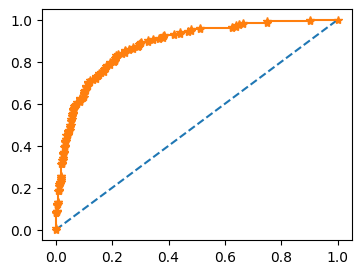

In [ ]:
auc_trainLG=roc_auc_score(y_train,y_trainprobsLG1)
print(auc_trainLG)
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobsLG)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.12670740912079081


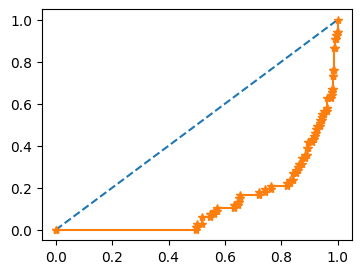

In [ ]:
auc_testLG=roc_auc_score(y_test,y_testprobsLG1)
print(auc_testLG)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsLG1)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

* To overcome class imbalance,SMOTE technique can be used and class imbalance
can be treated.
* For that, imported SMOTE from imblearn.over_sampling.
* Training data is over sampled.
* X_over_sampling and y_over_sampling were created and used in Logistic
Regression model bulding.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1225
1     153
Name: Default, dtype: int64

In [ ]:
y_test.value_counts()

0    613
1     67
Name: Default, dtype: int64

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
x_over_sample,y_over_sample=smote.fit_resample(x_train,y_train)

In [ ]:
model2=sm.Logit(y_over_sample,x_over_sample).fit()

Optimization terminated successfully.
         Current function value: 0.407661
         Iterations 9


In [ ]:
train_pred1=model2.predict(x_over_sample)
test_pred1=model2.predict(x_test)

In [ ]:
print(confusion_matrix(y_over_sample,train_pred1.round()))
print(classification_report(y_over_sample,train_pred1.round()))

[[1018  207]
 [ 226  999]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1225
           1       0.83      0.82      0.82      1225

    accuracy                           0.82      2450
   macro avg       0.82      0.82      0.82      2450
weighted avg       0.82      0.82      0.82      2450



Both precision and recall we obtained after using SMOTE are good with 83 and 82
for class 1 which is defaults.

In [ ]:
print(confusion_matrix(y_test,test_pred1.round()))
print(classification_report(y_test,test_pred1.round()))

[[497 116]
 [ 16  51]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       613
           1       0.31      0.76      0.44        67

    accuracy                           0.81       680
   macro avg       0.64      0.79      0.66       680
weighted avg       0.90      0.81      0.84       680



Recall value obtained is good but this method didn’t work well on precision value

In [ ]:
y_trainprobsLGS=model2.predict(x_over_sample)
y_testprobsLGS=model2.predict(x_test)

In [ ]:
y_trainprobsLG2=1-y_trainprobsLGS

In [ ]:
y_testprobsLG2=1-y_testprobsLGS

0.10139575177009578


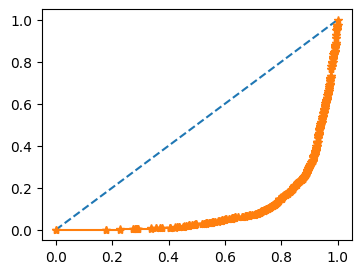

In [ ]:
auc_trainLGS=roc_auc_score(y_over_sample,y_trainprobsLG2)
print(auc_trainLGS)
fpr,tpr,thresholds=roc_curve(y_over_sample,y_trainprobsLG2)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.12042560444108982


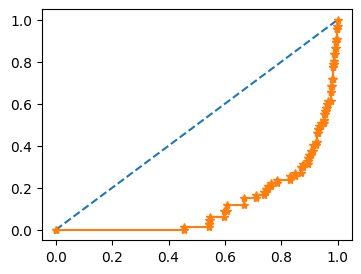

In [ ]:
auc_testLGS=roc_auc_score(y_test,y_testprobsLG2)
print(auc_testLGS)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsLG2)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

Both precision and recall we obtained after using SMOTE are good with 83 and 82
for class 1 which is defaults.

#1.7. Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier()

In [ ]:
RF_model=RF.fit(x_train,y_train)

In [ ]:
RF_train=RF_model.predict(x_train)
RF_test=RF_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,RF_train))
print(classification_report(y_train,RF_train))

[[1225    0]
 [   0  153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



Random forest classifier model performed well on training set, precision and recall
both are same for training set for default (1).

In [ ]:
print(confusion_matrix(y_test,RF_test))
print(classification_report(y_test,RF_test))

[[603  10]
 [ 44  23]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       613
           1       0.70      0.34      0.46        67

    accuracy                           0.92       680
   macro avg       0.81      0.66      0.71       680
weighted avg       0.91      0.92      0.91       680



* Random forest model didn’t work well on test set for default 1.
* Precision and recall both are very less compared to training set.

In [ ]:
y_trainprobsRF=RF_model.predict_proba(x_train)
y_testprobsRF=RF_model.predict_proba(x_test)

In [ ]:
y_trainprobsRF=y_trainprobsRF[:,1]

In [ ]:
y_testprobsRF=y_testprobsRF[:,1]

1.0


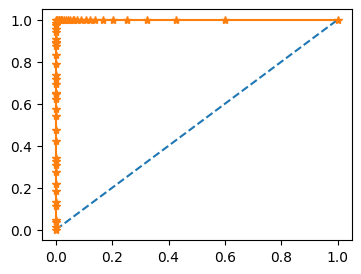

In [ ]:
auc_trainRF=roc_auc_score(y_train,y_trainprobsRF)
print(auc_trainRF)
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobsRF)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.922585279150739


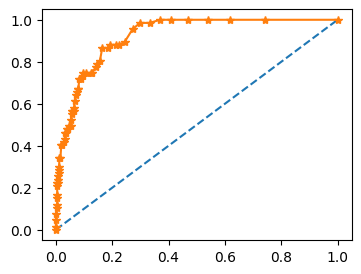

In [ ]:
auc_testRF=roc_auc_score(y_test,y_testprobsRF)
print(auc_testRF)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsRF)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

In [ ]:
RF_model1=RF.fit(x_over_sample,y_over_sample)

In [ ]:
RF_train1=RF_model1.predict(x_over_sample)
RF_test1=RF_model1.predict(x_test)

In [ ]:
print(confusion_matrix(y_over_sample,RF_train1))
print(classification_report(y_over_sample,RF_train1))

[[1225    0]
 [   0 1225]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00      1225

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450



Random Forest after using SMOTE gave good values of Recall and Precision for
both training and test set

In [ ]:
print(confusion_matrix(y_test,RF_test1))
print(classification_report(y_test,RF_test1))

[[585  28]
 [ 29  38]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       613
           1       0.58      0.57      0.57        67

    accuracy                           0.92       680
   macro avg       0.76      0.76      0.76       680
weighted avg       0.92      0.92      0.92       680



Random Forest didn’t work well on precision and recall for test set either after using
SMOTE.

In [ ]:
y_trainprobsRFS=RF_model1.predict_proba(x_over_sample)
y_testprobsRFS=RF_model1.predict_proba(x_test)

In [ ]:
y_trainprobsRFS=y_trainprobsRFS[:,1]

In [ ]:
y_testprobsRFS=y_testprobsRFS[:,1]

1.0


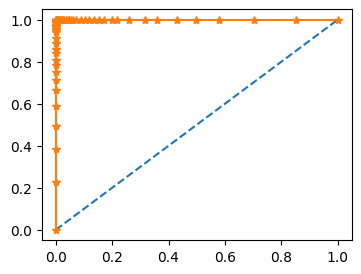

In [ ]:
auc_trainRFS=roc_auc_score(y_over_sample,y_trainprobsRFS)
print(auc_trainRFS)
fpr,tpr,thresholds=roc_curve(y_over_sample,y_trainprobsRFS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.9048355287185605


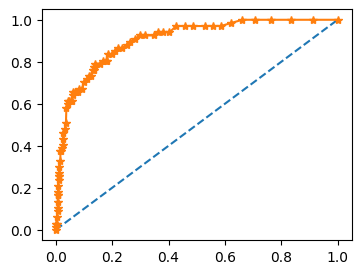

In [ ]:
auc_testRFS=roc_auc_score(y_test,y_testprobsRFS)
print(auc_testRFS)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsRFS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#1.9. Build a LDA Model on Train Dataset. Also showcase your model building approach

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()

In [ ]:
LDA_model=LDA.fit(x_train,y_train)

In [ ]:
LDA_train=LDA_model.predict(x_train)
LDA_test=LDA_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,LDA_train))
print(classification_report(y_train,LDA_train))

[[1175   50]
 [  86   67]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1225
           1       0.57      0.44      0.50       153

    accuracy                           0.90      1378
   macro avg       0.75      0.70      0.72      1378
weighted avg       0.89      0.90      0.90      1378



Precision for default on training set is 57% and recall is 44%.

In [ ]:
print(confusion_matrix(y_test,LDA_test))
print(classification_report(y_test,LDA_test))

[[581  32]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       613
           1       0.52      0.51      0.51        67

    accuracy                           0.90       680
   macro avg       0.73      0.73      0.73       680
weighted avg       0.90      0.90      0.90       680



* Precision for default (1) is 52% and recall is 51%.
* Precision for training set and test set has a diff on of 5%, LDA performed well in terms of precision for training set but it performed less in test set when compared.
* Recall for training and test set has a difference of 7%, LDA performed well in terms of recall for test but it performed less in training set when compared.

In [ ]:
y_trainprobsLDA=LDA_model.predict_proba(x_train)
y_testprobsLDA=LDA_model.predict_proba(x_test)

In [ ]:
y_trainprobsLDA=y_trainprobsLDA[:,1]

In [ ]:
y_testprobsLDA=y_testprobsLDA[:,1]

0.8800853674803254


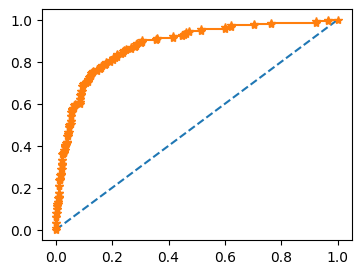

In [ ]:
auc_trainLDA=roc_auc_score(y_train,y_trainprobsLDA)
print(auc_trainLDA)
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobsLDA)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8860753329599961


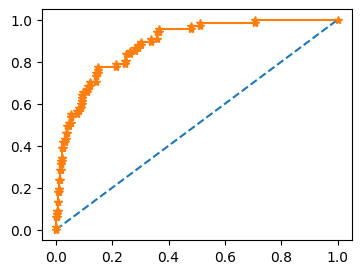

In [ ]:
auc_testLDA=roc_auc_score(y_test,y_testprobsLDA)
print(auc_testLDA)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsLDA)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

In [ ]:
LDA_model1=LDA.fit(x_over_sample,y_over_sample)

In [ ]:
LDA_train1=LDA_model1.predict(x_over_sample)
LDA_test1=LDA_model1.predict(x_test)

In [ ]:
print(confusion_matrix(y_over_sample,LDA_train1))
print(classification_report(y_over_sample,LDA_train1))

[[1035  190]
 [ 218 1007]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1225
           1       0.84      0.82      0.83      1225

    accuracy                           0.83      2450
   macro avg       0.83      0.83      0.83      2450
weighted avg       0.83      0.83      0.83      2450



Precision and recall for training after using SMOTE are good on train set

In [ ]:
print(confusion_matrix(y_test,LDA_test1))
print(classification_report(y_test,LDA_test1))

[[508 105]
 [ 16  51]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       613
           1       0.33      0.76      0.46        67

    accuracy                           0.82       680
   macro avg       0.65      0.79      0.68       680
weighted avg       0.91      0.82      0.85       680



Recall values for test are good after using SMOTE but precision didn’t work well for
this model.

In [ ]:
y_trainprobsLDAS=LDA_model1.predict_proba(x_over_sample)
y_testprobsLDAS=LDA_model1.predict_proba(x_test)

In [ ]:
y_trainprobsLDAS=y_trainprobsLDAS[:,1]

In [ ]:
y_testprobsLDAS=y_testprobsLDAS[:,1]

0.9013810912119951


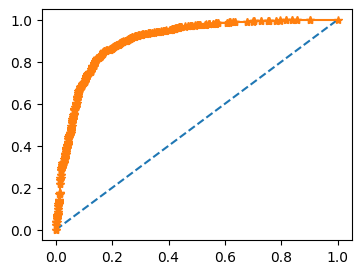

In [ ]:
auc_trainLDAS=roc_auc_score(y_over_sample,y_trainprobsLDAS)
print(auc_trainLDAS)
fpr,tpr,thresholds=roc_curve(y_over_sample,y_trainprobsLDAS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8877310024104601


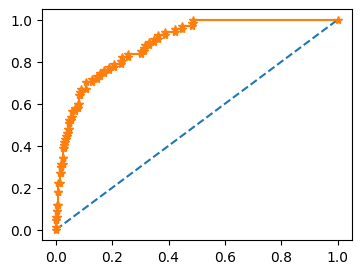

In [ ]:
auc_testLDAS=roc_auc_score(y_test,y_testprobsLDAS)
print(auc_testLDAS)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsLDAS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Conclusions and recommendations:
* As we are talking about getting investment and also paying the existing debt
and the interest of the companies, we should consider precision and recall as
our metric to evaluate the model performance.
* Logistic Regression model performed well, when taking precision into
consideration and doesn’t perform well when recall is taken into consideration.
* Logistic Regression after over sampling the default class performed well both
in precision and recall in training set.
* However it didn’t perform well in precision after over sampling, but performed
well in recall.
* Random Forest performed very well in both precision and recall on training
set.
* However in test set it did well in precision but didn’t go well for recall.
* Same goes for Random forest after using smote technique, it did well both in
precision and recall for training set, but when it comes to test, both precision and recall are close to 60%.
* Linear discriminant analysis didn’t give much result for both precision and
recall in training and test set.
* After using SMOTE technique, it gave good results in terms of recall and
didn’t work well for precision.
* When taking AUC into consideration, Random forest and Linear discriminant
analysis performance in both train and test set is very near for random forest
and same in LDA.
* When coming to ROC curve, Logistic Regression didn’t do well for both train
and test, before and after using smote.
* ROC curve gave good results for Random Forest and Linear discriminant
analysis for both training and test set and also before and after using smote
technique.
* If we going to take recall into consideration, Logistic Regression and Linear
Discriminant analysis both are good.
* If we take precision into consideration, Logistic Regression without using
smote gives good results.
* If we don’t want companies to not default, operating profit growth rate must be increased.
* Cash reinvestment price must be increased, for preventing companies to be
defaulted.
* Interest expense ratio also must be increased.
* Total debt to total net worth must be decreased to prevent companies from
defaulting.
* Long term fund suitability ratio must be also increased.
* Cash to total assets should also be increased to prevent companies from
defaulting.
* Inventory to working capital must be increased
